1     0.405258
2     0.404354
3     0.411266
4     0.409406
5     0.406006
6     0.407637
7     0.404805
8     0.413829
9     0.405820
10    0.405415
11    0.420764
12    0.405648
13    0.406569
14    0.416867
15    0.411631
dtype: float64
0     3.507004
1     3.637622
2     3.627166
3     3.651145
4     3.640242
5     3.608927
6     3.623156
7     3.611018
8     3.623875
9     3.662802
10    3.621081
11    3.619239
12    3.628400
13    3.663927
14    3.624948
15    3.632911
dtype: float64
0.40901828666666673
3.6317640800000004


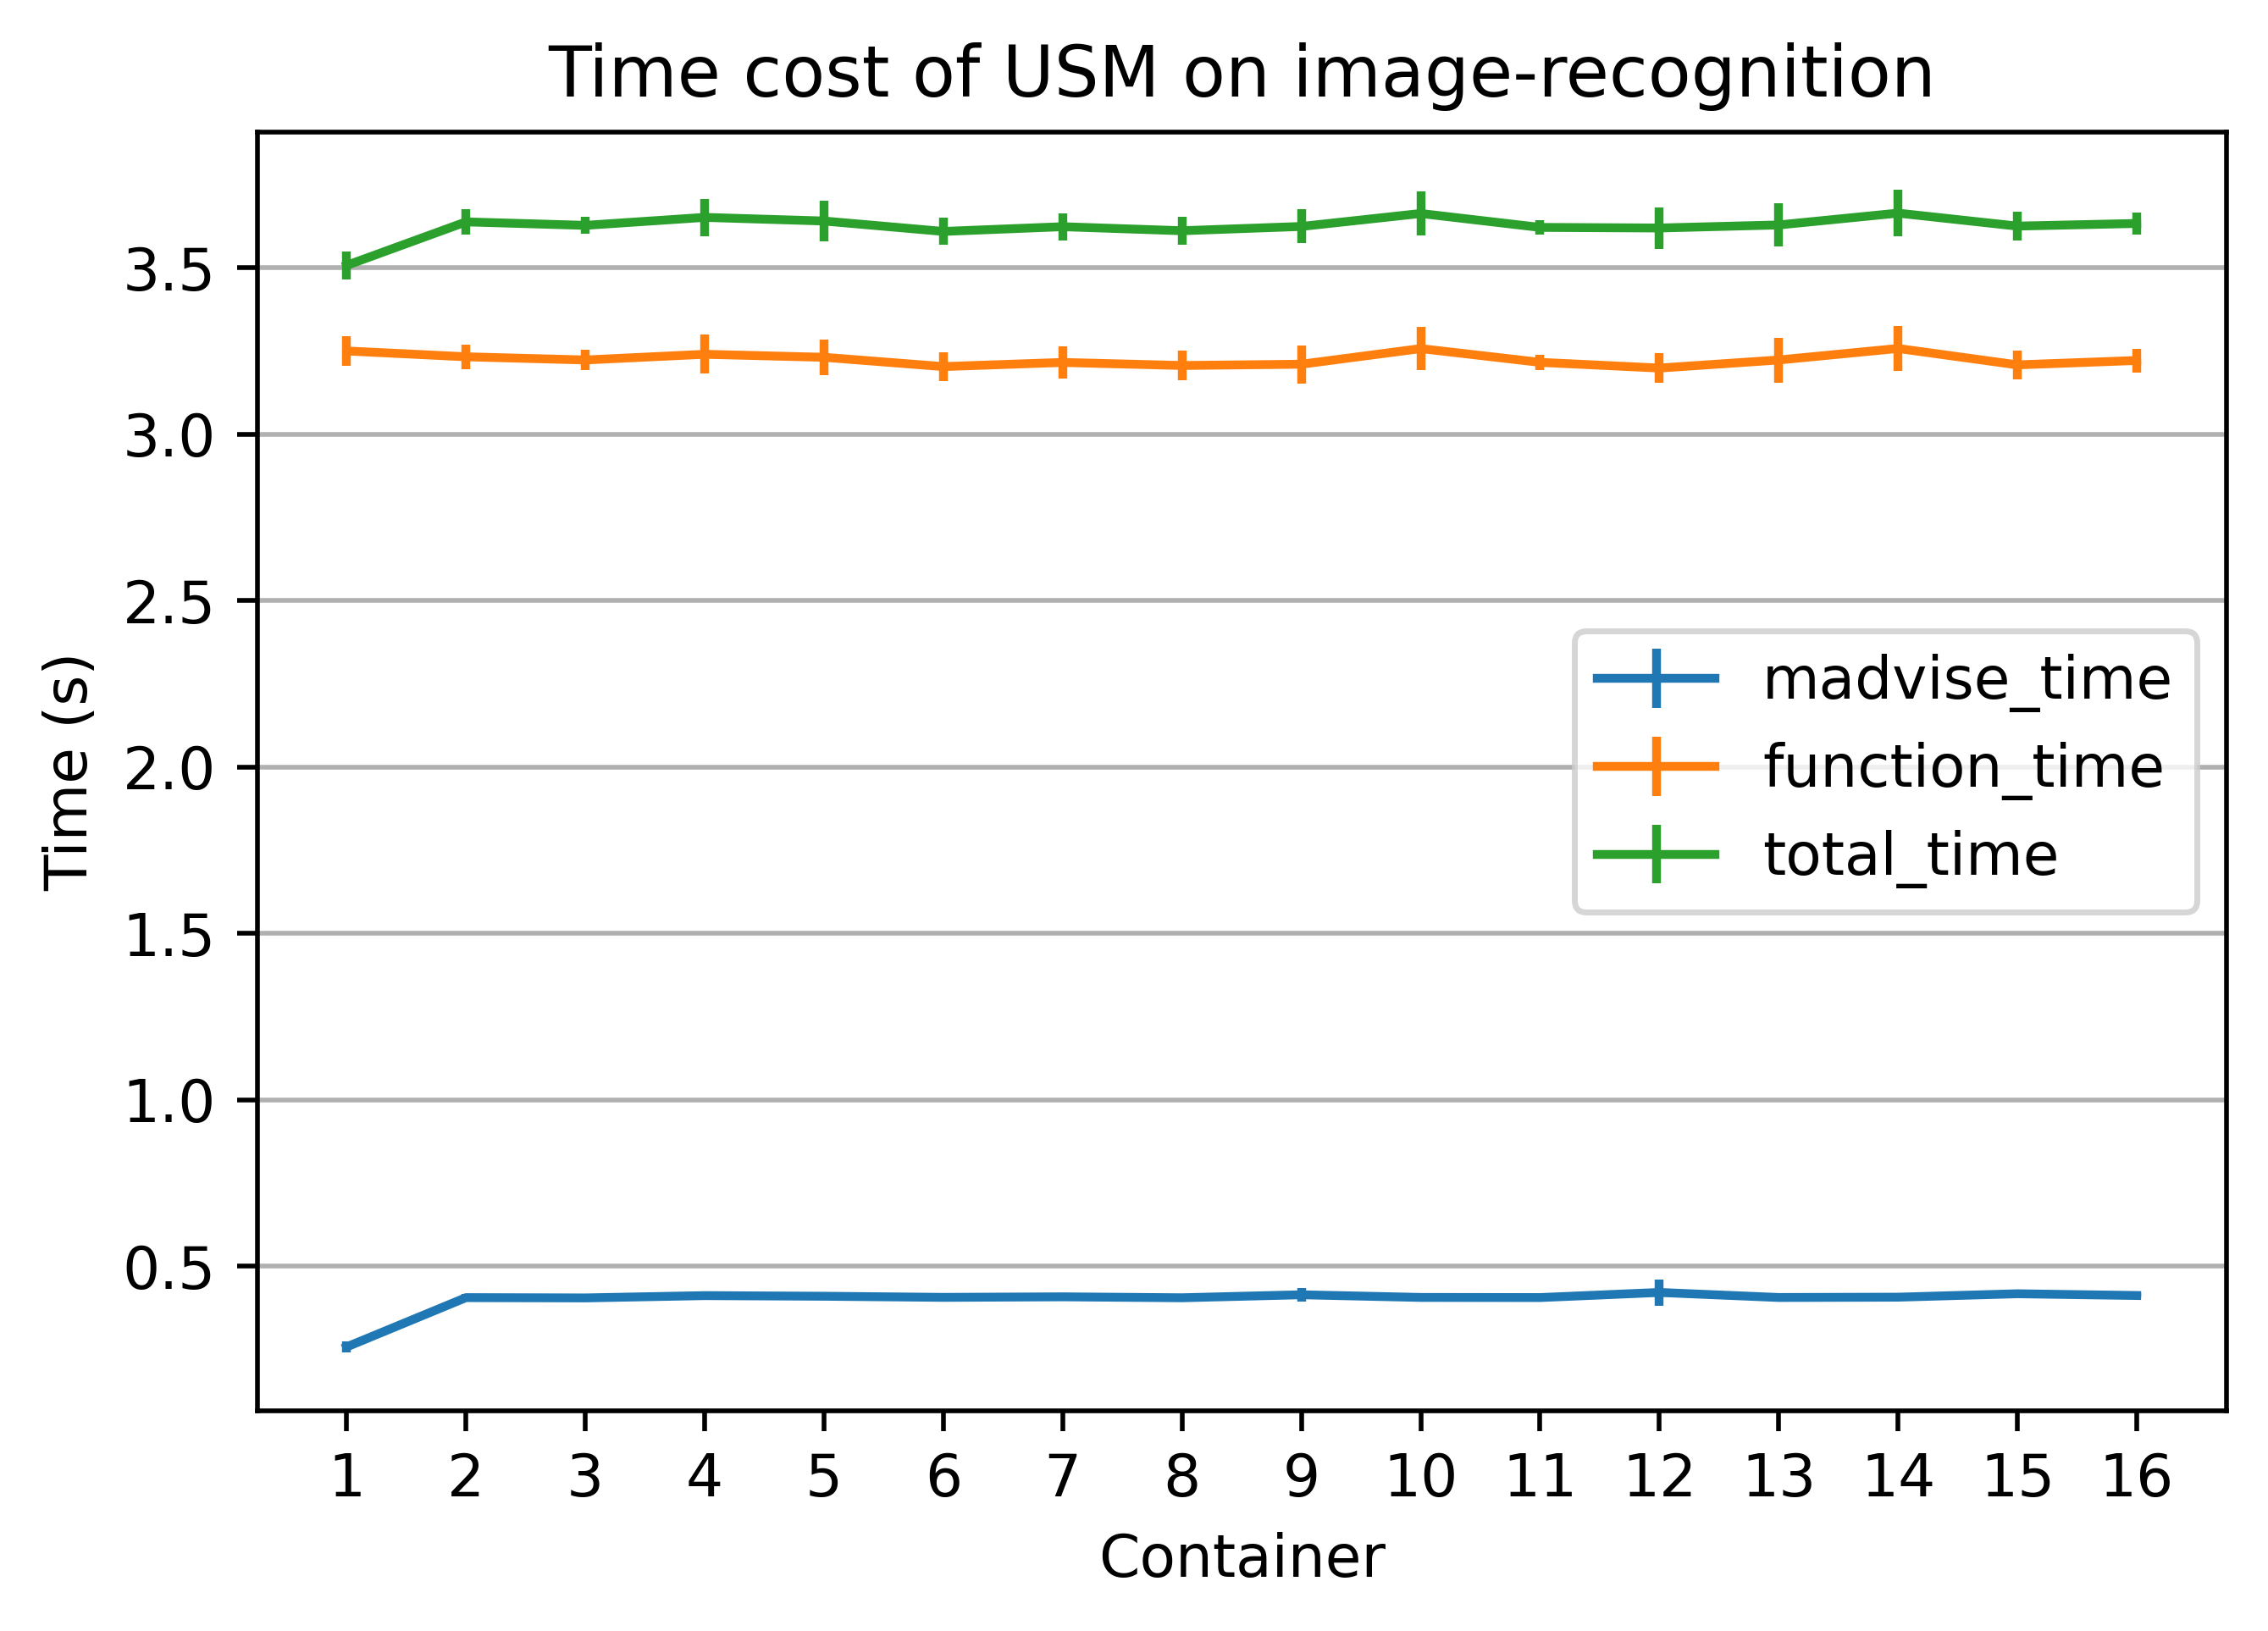

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import json
import numpy as np
#./plot_function_time.py $machine


# machine = sys.argv[1]  # 0 is the current script name

usm_data_dir = r"C:\Users\facel\usm_plot_data_needed"
machine = r"einstein_vm"
benchmark = "411.image-recognition"
    

# the ith element means the avg and error of the ith container
madvise_time_avg = []
madvise_time_err = []
function_time_avg = []
function_time_err = []
total_time_avg = []
total_time_err = []

x = range(1, 17)
t = 16
c = 10
madvise_time_array = [[0.0 for x in range(c)] for y in range(t)]
function_time_array = [[0.0 for x in range(c)] for y in range(t)]
total_time_array = [[0.0 for x in range(c)] for y in range(t)]

for i in range(1, 11):
    times_dir = "times" + str(i)
    for j in range(1, 17):
        container_file = "container" + str(j) + ".json"
        f = open(os.path.join(usm_data_dir, machine, "time_cost", benchmark, times_dir, container_file))
        json_data = json.load(f)
        madvise_time = json_data["result"]["output"]["measurement"]["madvise_time"]
        total_time = json_data["result"]["output"]["measurement"]["handler_time"]
        function_time = json_data["result"]["output"]["measurement"]["download_time"] + json_data["result"]["output"]["measurement"]["compute_time"]
        madvise_time_array[j-1][i-1]= (madvise_time)
        function_time_array[j-1][i-1]=(function_time)
        total_time_array[j-1][i-1]=(total_time)
#         print("times:", i, "container:", j, "madvise_time:", madvise_time, "function_time", function_time, "total_time", total_time)

# print(madvise_time_array[1])
for j in range(1, 17):
    madvise_time_avg.append(np.mean(madvise_time_array[j-1]))
    madvise_time_err.append(np.std(madvise_time_array[j-1]))
    function_time_avg.append(np.mean(function_time_array[j-1]))
    function_time_err.append(np.std(function_time_array[j-1]))
    total_time_avg.append(np.mean(total_time_array[j-1]))
    total_time_err.append(np.std(total_time_array[j-1]))

    
madvise_time_avg = pd.Series(madvise_time_avg) / 1000000
madvise_time_err = pd.Series(madvise_time_err) / 1000000
function_time_avg = pd.Series(function_time_avg) / 1000000
function_time_err = pd.Series(function_time_err) / 1000000
total_time_avg = pd.Series(total_time_avg) / 1000000
total_time_err = pd.Series(total_time_err) / 1000000

plt.errorbar(x, madvise_time_avg, madvise_time_err, label='madvise_time')
plt.errorbar(x, function_time_avg, function_time_err, label='function_time')
plt.errorbar(x, total_time_avg, total_time_err, label='total_time')

print(madvise_time_avg[1:])
print(total_time_avg)

print(np.mean(madvise_time_avg[1:]))
print(np.mean(total_time_avg[1:]))

plt.grid(axis='y')
plt.title("Time cost of USM on image-recognition")
plt.xlabel('Container')
plt.ylabel('Time (s)')
plt.xticks(x)
# plt.ylim(ymin=0)
plt.legend()
plt.rcParams['figure.dpi'] = 500
# plt.savefig(os.path.join(usm_data_dir, machine, "pictures", 'function_time.jpg'))

#plt.show()


/work/serverless/2022/memdedup/usm_plot_data_needed/cscs_vm/time_cost/411.image-recognition/times1/container1.json
{"begin": "1642098490.217400", "end": "1642098491.001848", "request_id": "bd2c4fc5-9647-49a9-ad48-09cfdbcb8258", "is_cold": false, "result": {"output": {"result": {"idx": 817, "class": "sports_car"}, "measurement": {"download_time": 202618.0, "compute_time": 1123156.0, "model_time": 789577.0, "model_download_time": 176544.0, "madvise_time": 88268.0, "handler_time": 1414098.0}}}}{"begin": "1642103891.732370", "end": "1642103892.161285", "request_id": "3c111698-9441-4092-bd52-27aacafbe7ef", "is_cold": false, "result": {"output": {"result": {"idx": 817, "class": "sports_car"}, "measurement": {"download_time": 157445.0, "compute_time": 1094193.0, "model_time": 831768.0, "model_download_time": 138368.0, "madvise_time": 36769.0, "handler_time": 1288454.0}}}}
{"begin": "1642103891.732370", "end": "1642103892.161285", "request_id": "3c111698-9441-4092-bd52-27aacafbe7ef", "is_cold"

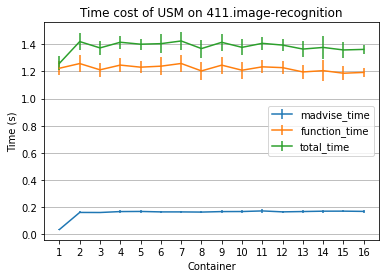

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import json
import numpy as np
#./plot_function_time.py $machine


# machine = sys.argv[1]  # 0 is the current script name

usm_data_dir = r"/work/serverless/2022/memdedup/usm_plot_data_needed"
machine = r"cscs_vm"
benchmark = "411.image-recognition"


# the ith element means the avg and error of the ith container
madvise_time_avg = []
madvise_time_err = []
function_time_avg = []
function_time_err = []
total_time_avg = []
total_time_err = []

x = range(1, 17)
t = 16
c = 10
madvise_time_array = [[0.0 for x in range(c)] for y in range(t)]
function_time_array = [[0.0 for x in range(c)] for y in range(t)]
total_time_array = [[0.0 for x in range(c)] for y in range(t)]

for i in range(1, 11):
    times_dir = "times" + str(i)
    for j in range(1, 17):
        container_file = "container" + str(j) + ".json"
        f = open(os.path.join(usm_data_dir, machine, "time_cost", benchmark, times_dir, container_file))
        #print(f)
        print(os.path.join(usm_data_dir, machine, "time_cost", benchmark, times_dir, container_file))
        data = f.read()
        if data.count("begin") > 1:
            print(data)
            d = '{"begin' + data.split("begin")[-1]
            print(d)
            json_data = json.loads(d)
            print(d)
        else:
            json_data = json.loads(data)
        madvise_time = json_data["result"]["output"]["measurement"]["madvise_time"]
        total_time = json_data["result"]["output"]["measurement"]["handler_time"]
        function_time = json_data["result"]["output"]["measurement"]["download_time"] + json_data["result"]["output"]["measurement"]["compute_time"]
        madvise_time_array[j-1][i-1]= (madvise_time)
        function_time_array[j-1][i-1]=(function_time)
        total_time_array[j-1][i-1]=(total_time)
#         print("times:", i, "container:", j, "madvise_time:", madvise_time, "function_time", function_time, "total_time", total_time)

# print(madvise_time_array[1])
for j in range(1, 17):
    madvise_time_avg.append(np.mean(madvise_time_array[j-1]))
    madvise_time_err.append(np.std(madvise_time_array[j-1]))
    function_time_avg.append(np.mean(function_time_array[j-1]))
    function_time_err.append(np.std(function_time_array[j-1]))
    total_time_avg.append(np.mean(total_time_array[j-1]))
    total_time_err.append(np.std(total_time_array[j-1]))

    
madvise_time_avg = pd.Series(madvise_time_avg) / 1000000
madvise_time_err = pd.Series(madvise_time_err) / 1000000
function_time_avg = pd.Series(function_time_avg) / 1000000
function_time_err = pd.Series(function_time_err) / 1000000
total_time_avg = pd.Series(total_time_avg) / 1000000
total_time_err = pd.Series(total_time_err) / 1000000

plt.errorbar(x, madvise_time_avg, madvise_time_err, label='madvise_time')
plt.errorbar(x, function_time_avg, function_time_err, label='function_time')
plt.errorbar(x, total_time_avg, total_time_err, label='total_time')

print(madvise_time_avg[1:])
print(total_time_avg)

print(np.mean(madvise_time_avg[1:]))
print(np.mean(total_time_avg[1:]))
print("madvise / total:", np.mean(madvise_time_avg[1:]) /np.mean(total_time_avg[1:]) * 100 )

plt.grid(axis='y')
plt.title("Time cost of USM on " + benchmark)
plt.xlabel('Container')
plt.ylabel('Time (s)')
plt.xticks(x)
# plt.ylim(ymin=0)
plt.legend()
plt.rcParams['figure.dpi'] = 500
# plt.savefig(os.path.join(usm_data_dir, machine, "pictures", 'function_time.jpg'))

#plt.show()

In [7]:
for i in range(1,9):
    print(i)

1
2
3
4
5
6
7
8


     repetition  container      type      time
0             1          1   Madvise  0.036769
1             1          1     Total  1.288454
2             1          1  Function  1.251638
3             1          2   Madvise  0.158891
4             1          2     Total  1.544301
..          ...        ...       ...       ...
475          10         15     Total  1.319038
476          10         15  Function  1.145424
477          10         16   Madvise  0.168244
478          10         16     Total  1.327404
479          10         16  Function  1.159112

[480 rows x 4 columns]
[[36769.0, 38449.0, 36744.0, 37462.0, 37567.0, 37360.0, 27639.0, 36336.0, 34608.0, 37569.0], [158891.0, 165915.0, 164490.0, 158627.0, 166570.0, 167932.0, 145862.0, 156677.0, 172835.0, 160413.0], [158323.0, 170210.0, 163294.0, 160961.0, 169350.0, 163719.0, 142757.0, 162113.0, 160352.0, 162505.0], [162741.0, 173077.0, 165736.0, 165009.0, 173388.0, 175200.0, 146141.0, 154894.0, 171220.0, 194436.0], [168176.0, 16

/tmp/ipykernel_1355308/1297184379.py:93: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df, x="container", y="time", hue="type", estimator=p50_estimator,ci=95)


1     0.161821
2     0.161358
3     0.168184
4     0.169087
5     0.165776
6     0.165730
7     0.164464
8     0.168048
9     0.168530
10    0.172944
11    0.166042
12    0.168441
13    0.171055
14    0.171286
15    0.169521
dtype: float64
0     1.259899
1     1.420103
2     1.373524
3     1.415102
4     1.400795
5     1.404739
6     1.424560
7     1.368559
8     1.414638
9     1.377662
10    1.407126
11    1.394197
12    1.364974
13    1.376971
14    1.358403
15    1.362526
dtype: float64
0.16748590666666666
1.3909253066666667
madvise / total: 12.041330031448224
/work/serverless/2022/memdedup/usm_plot_data_needed2/cscs_vm/plots/time_411.image-recognition.pdf


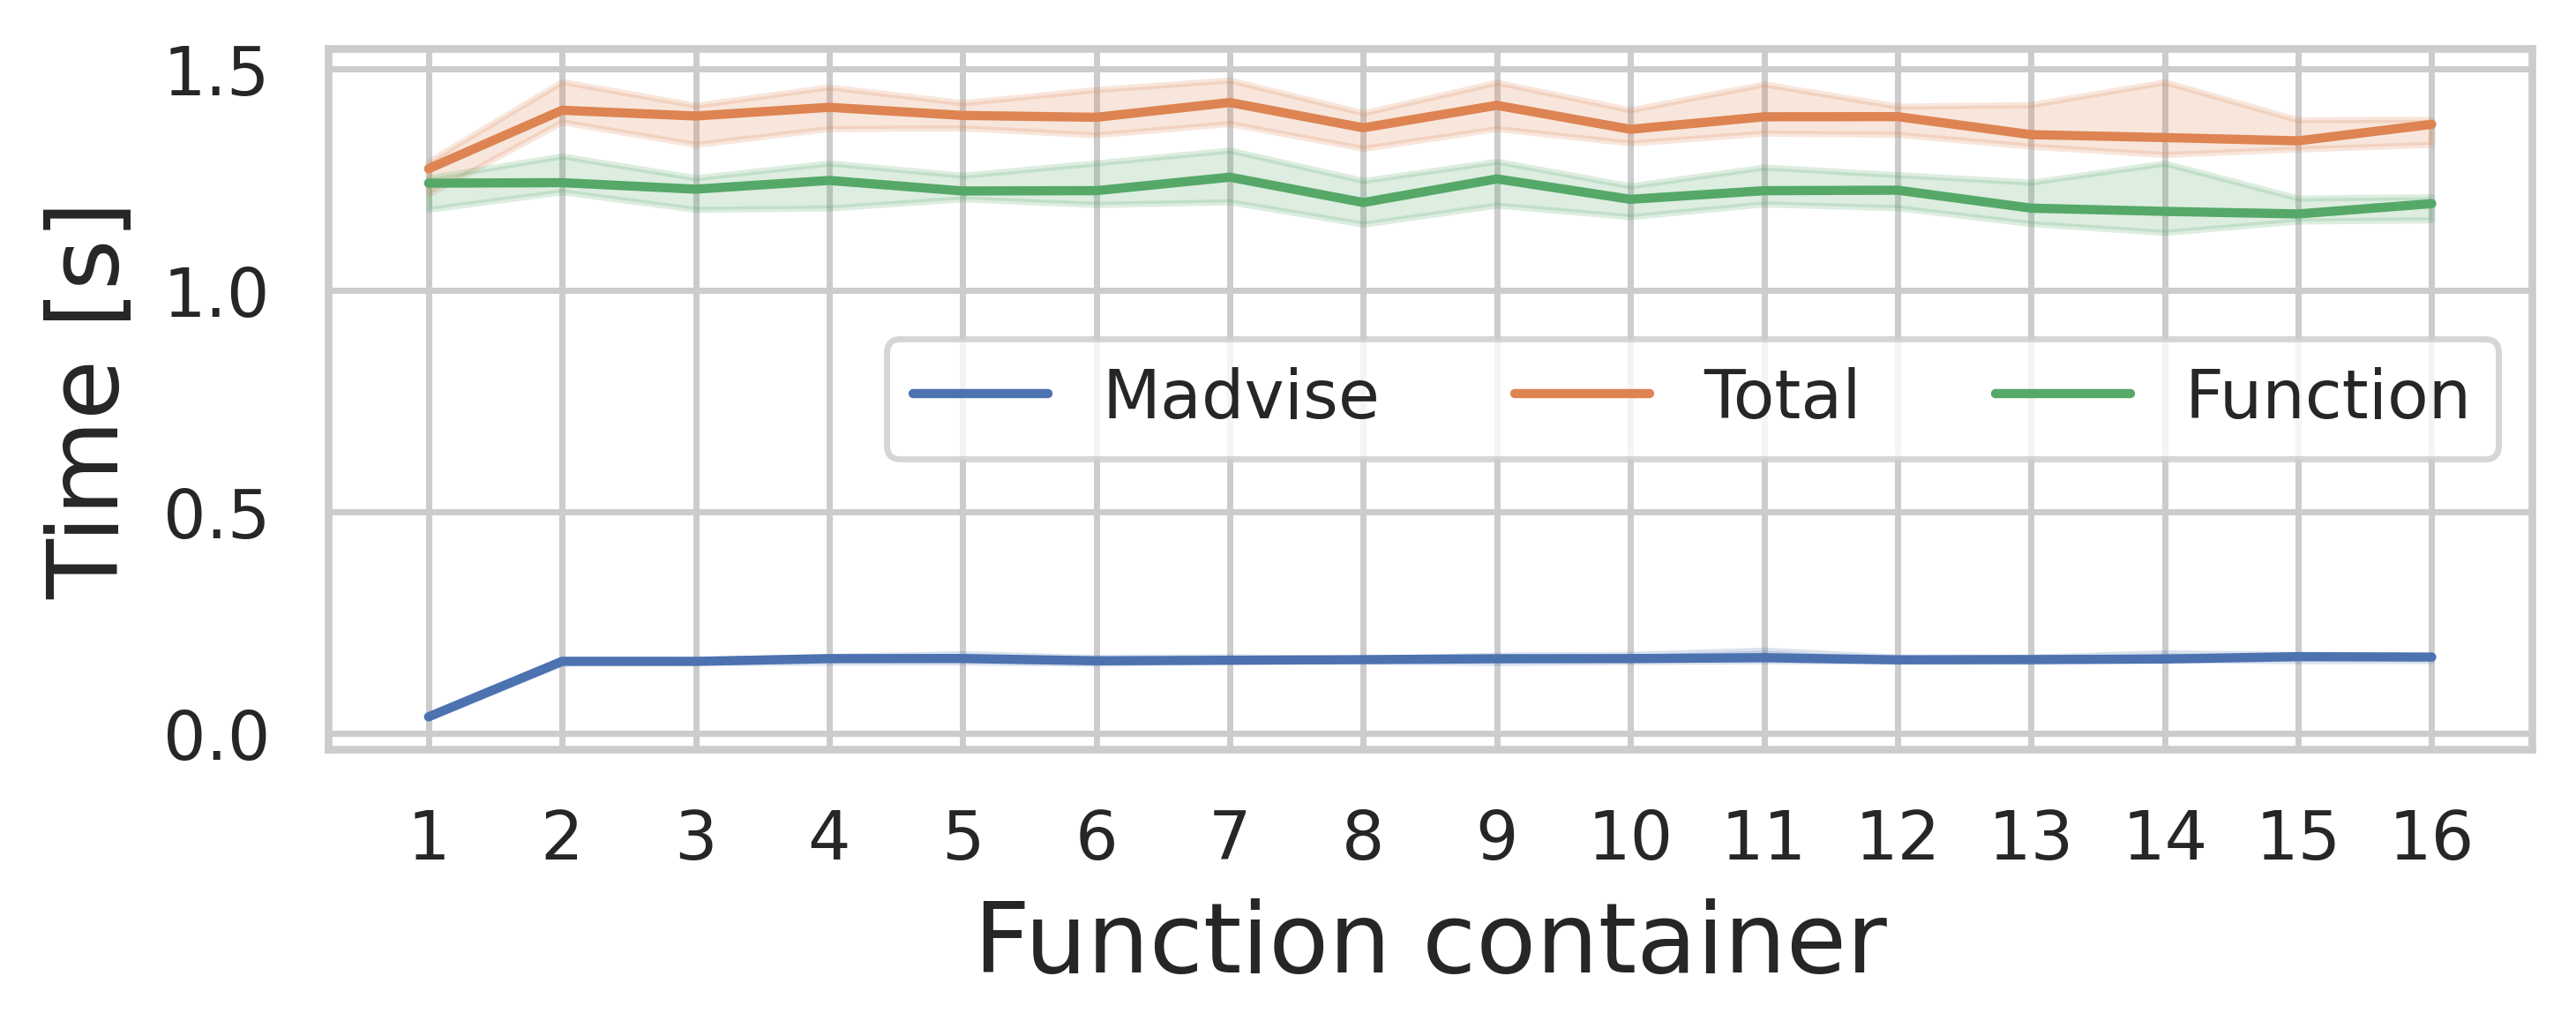

In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import os
import json
import numpy as np
import seaborn as sns
#./plot_function_time.py $machine                       
sns.set_style("whitegrid")  
sns.set(rc={'figure.figsize':(6,2.5)})                             
sns.set_style("whitegrid")  

# machine = sys.argv[1]  # 0 is the current script name

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


usm_data_dir = r"/work/serverless/2022/memdedup/usm_plot_data_needed2"
machine = r"cscs_vm"
benchmark = "411.image-recognition"
#benchmark = "recognition-alexnet"
def p50_estimator(x):                                            
    return np.percentile(x, 50)           

# the ith element means the avg and error of the ith container
madvise_time_avg = []
madvise_time_err = []
function_time_avg = []
function_time_err = []
total_time_avg = []
total_time_err = []

x = range(1, 17)
t = 16
c = 10
madvise_time_array = [[0.0 for x in range(c)] for y in range(t)]
function_time_array = [[0.0 for x in range(c)] for y in range(t)]
total_time_array = [[0.0 for x in range(c)] for y in range(t)]

rows = []
for i in range(1, 11):
    times_dir = "times" + str(i)
    for j in range(1, 17):
        container_file = "container" + str(j) + ".json"
        f = open(os.path.join(usm_data_dir, machine, "time_cost", benchmark, times_dir, container_file))
        #print(f)
        #print(os.path.join(usm_data_dir, machine, "time_cost", benchmark, times_dir, container_file))
        data = f.read()
        if data.count("begin") > 1:
            #print(data)
            d = '{"begin' + data.split("begin")[-1]
            #print(d)
            json_data = json.loads(d)
            #print(d)
        else:
            json_data = json.loads(data)
            
        madvise_time = json_data["result"]["output"]["measurement"]["madvise_time"]
        total_time = json_data["result"]["output"]["measurement"]["handler_time"]
        function_time = json_data["result"]["output"]["measurement"]["download_time"] + json_data["result"]["output"]["measurement"]["compute_time"]
        rows.append([i, j, "Madvise", madvise_time/1000000])
        rows.append([i, j, "Total", total_time/1000000])
        rows.append([i, j, "Function", function_time/1000000])
        madvise_time_array[j-1][i-1]= (madvise_time)
        function_time_array[j-1][i-1]=(function_time)
        total_time_array[j-1][i-1]=(total_time)
#         print("times:", i, "container:", j, "madvise_time:", madvise_time, "function_time", function_time, "total_time", total_time)

df = pd.DataFrame(rows, columns = ["repetition", "container", "type", "time"])
print(df)

print(madvise_time_array)

# print(madvise_time_array[1])
for j in range(1, 17):
    madvise_time_avg.append(np.mean(madvise_time_array[j-1]))
    madvise_time_err.append(np.std(madvise_time_array[j-1]))
    function_time_avg.append(np.mean(function_time_array[j-1]))
    function_time_err.append(np.std(function_time_array[j-1]))
    total_time_avg.append(np.mean(total_time_array[j-1]))
    total_time_err.append(np.std(total_time_array[j-1]))

    
madvise_time_avg = pd.Series(madvise_time_avg) / 1000000
madvise_time_err = pd.Series(madvise_time_err) / 1000000
function_time_avg = pd.Series(function_time_avg) / 1000000
function_time_err = pd.Series(function_time_err) / 1000000
total_time_avg = pd.Series(total_time_avg) / 1000000
total_time_err = pd.Series(total_time_err) / 1000000

sns.lineplot(data=df, x="container", y="time", hue="type", estimator=p50_estimator,ci=95)
#plt.errorbar(x, madvise_time_avg, madvise_time_err, label='madvise_time')
#plt.errorbar(x, function_time_avg, function_time_err, label='function_time')
#plt.errorbar(x, total_time_avg, total_time_err, label='total_time')

print(madvise_time_avg[1:])
print(total_time_avg)

print(np.mean(madvise_time_avg[1:]))
print(np.mean(total_time_avg[1:]))
print("madvise / total:", np.mean(madvise_time_avg[1:]) /np.mean(total_time_avg[1:]) * 100 )

#plt.grid(axis='y')
#plt.title(benchmark, fontsize=20)
plt.xlabel('Function container',fontsize=16)
plt.ylabel('Time [s]', fontsize=16)
plt.xticks(x)
# plt.ylim(ymin=0)
plt.legend(ncol=3)
plt.rcParams['figure.dpi'] = 500
plt.tight_layout()
print(os.path.join(usm_data_dir, machine, "plots", f'time_{benchmark}.pdf'))
plt.savefig(os.path.join(usm_data_dir, machine, "plots", f'time_{benchmark}.pdf'))

#plt.show()